In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
pollution=pd.read_csv(r"E:\Air Quality Monitoring\Air_Quality.csv",parse_dates=['last_update'])

In [ ]:
pollution

id country           state       city                         station  \
0        1   India  Andhra_Pradesh  Amaravati  Secretariat, Amaravati - APPCB   
1        2   India  Andhra_Pradesh  Amaravati  Secretariat, Amaravati - APPCB   
2        3   India  Andhra_Pradesh  Amaravati  Secretariat, Amaravati - APPCB   
3        4   India  Andhra_Pradesh  Amaravati  Secretariat, Amaravati - APPCB   
4        5   India  Andhra_Pradesh  Amaravati  Secretariat, Amaravati - APPCB   
...    ...     ...             ...        ...                             ...   
1831  1832   India     West_Bengal    Kolkata       Victoria, Kolkata - WBPCB   
1832  1833   India     West_Bengal    Kolkata       Victoria, Kolkata - WBPCB   
1833  1834   India     West_Bengal    Kolkata       Victoria, Kolkata - WBPCB   
1834  1835   India     West_Bengal    Kolkata       Victoria, Kolkata - WBPCB   
1835  1836   India     West_Bengal    Kolkata       Victoria, Kolkata - WBPCB   

     pollutant_id         last_update  pollutant_min  pollutant_max  \
0           PM2.5 2021-10-21 01:00:00           69.0          109.0   
1            PM10 2021-10-21 01:00:00           82.0          138.0   
2             NO2 2021-10-21 01:00:00           10.0           42.0   
3             NH3 2021-10-21 01:00:00            4.0            5.0   
4             SO2 2021-10-21 01:00:00           16.0           42.0   
...           ...                 ...            ...            ...   
1831          NO2 2021-10-21 01:00:00           10.0           22.0   
1832          NH3 2021-10-21 01:00:00            1.0            3.0   
1833          SO2 2021-10-21 01:00:00            6.0           28.0   
1834           CO 2021-10-21 01:00:00           34.0           92.0   
1835        OZONE 2021-10-21 01:00:00           10.0          116.0   

      pollutant_avg  
0              86.0  
1             105.0  
2              19.0  
3               4.0  
4              27.0  
...             ...  
1831           15.0  
1832            2.0  
1833           10.0  
1834           41.0  
1835           43.0  

[1836 rows x 10 columns]

In [ ]:
#Data Description
pollution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836 entries, 0 to 1835
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             1836 non-null   int64         
 1   country        1836 non-null   object        
 2   state          1836 non-null   object        
 3   city           1836 non-null   object        
 4   station        1836 non-null   object        
 5   pollutant_id   1836 non-null   object        
 6   last_update    1836 non-null   datetime64[ns]
 7   pollutant_min  1738 non-null   float64       
 8   pollutant_max  1738 non-null   float64       
 9   pollutant_avg  1738 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 143.6+ KB


In [ ]:
#Column names
pollution.columns

Index(['id', 'country', 'state', 'city', 'station', 'pollutant_id',
       'last_update', 'pollutant_min', 'pollutant_max', 'pollutant_avg'],
      dtype='object')

In [ ]:
#Dimension of the dataset
pollution.shape

(1836, 10)

In [ ]:
#Checking for duplicates
duplicate = pollution.duplicated().sum()
duplicate

0

There are no Duplicares!

In [ ]:
#Checking for null values
pollution.isnull().sum()

id                0
country           0
state             0
city              0
station           0
pollutant_id      0
last_update       0
pollutant_min    98
pollutant_max    98
pollutant_avg    98
dtype: int64

There are 98 null values in the column "pollutant_min", "pollutant_max", "pollutant_avg". Later in data preprocessing I have imputed them with the mean values.

In [ ]:
#Data description
pollution.describe()

id  pollutant_min  pollutant_max  pollutant_avg
count  1836.000000    1738.000000    1738.000000    1738.000000
mean    918.500000      28.414269      96.873418      54.100690
std     530.151865      34.403811     104.765094      60.824158
min       1.000000       1.000000       1.000000       1.000000
25%     459.750000       5.000000      21.000000      12.000000
50%     918.500000      14.000000      63.000000      31.000000
75%    1377.250000      39.000000     124.000000      70.000000
max    1836.000000     217.000000     500.000000     314.000000

There is a deviation of mean from the 50% or Median which in turn denotes that there are presence of outliers. But here outliers are important as it might denote some important information regarding high amount of pollution.

Data Preprocessing


In [ ]:
#Imputing the Null columns with mean
pollution['pollutant_min'] = pollution['pollutant_min'].fillna(pollution['pollutant_min'].mean())

In [12]:
#Correlation
sns.heatmap(pollution.corr(), annot = True)

<AxesSubplot:>

There seems to be a higher correlation between pollutant_max and pollutant_avg. Else other columns has normal correlation.



More insights via Data Visualization



SUB-OBJECTIVE 1: Number of pollutants found in each state



pollution.groupby()

In [13]:
pollution

id country           state       city                         station  \
0        1   India  Andhra_Pradesh  Amaravati  Secretariat, Amaravati - APPCB   
1        2   India  Andhra_Pradesh  Amaravati  Secretariat, Amaravati - APPCB   
2        3   India  Andhra_Pradesh  Amaravati  Secretariat, Amaravati - APPCB   
3        4   India  Andhra_Pradesh  Amaravati  Secretariat, Amaravati - APPCB   
4        5   India  Andhra_Pradesh  Amaravati  Secretariat, Amaravati - APPCB   
...    ...     ...             ...        ...                             ...   
1831  1832   India     West_Bengal    Kolkata       Victoria, Kolkata - WBPCB   
1832  1833   India     West_Bengal    Kolkata       Victoria, Kolkata - WBPCB   
1833  1834   India     West_Bengal    Kolkata       Victoria, Kolkata - WBPCB   
1834  1835   India     West_Bengal    Kolkata       Victoria, Kolkata - WBPCB   
1835  1836   India     West_Bengal    Kolkata       Victoria, Kolkata - WBPCB   

     pollutant_id         last_update  pollutant_min  pollutant_max  \
0           PM2.5 2021-10-21 01:00:00           69.0          109.0   
1            PM10 2021-10-21 01:00:00           82.0          138.0   
2             NO2 2021-10-21 01:00:00           10.0           42.0   
3             NH3 2021-10-21 01:00:00            4.0            5.0   
4             SO2 2021-10-21 01:00:00           16.0           42.0   
...           ...                 ...            ...            ...   
1831          NO2 2021-10-21 01:00:00           10.0           22.0   
1832          NH3 2021-10-21 01:00:00            1.0            3.0   
1833          SO2 2021-10-21 01:00:00            6.0           28.0   
1834           CO 2021-10-21 01:00:00           34.0           92.0   
1835        OZONE 2021-10-21 01:00:00           10.0          116.0   

      pollutant_avg  
0              86.0  
1             105.0  
2              19.0  
3               4.0  
4              27.0  
...             ...  
1831           15.0  
1832            2.0  
1833           10.0  
1834           41.0  
1835           43.0  

[1836 rows x 10 columns]

In [14]:
pollution.columns.tolist()

['id',
 'country',
 'state',
 'city',
 'station',
 'pollutant_id',
 'last_update',
 'pollutant_min',
 'pollutant_max',
 'pollutant_avg']

In [15]:
cities = pollution.city.unique().tolist()
cities

['Amaravati',
 'Rajamahendravaram',
 'Tirupati',
 'Visakhapatnam',
 'Guwahati',
 'Gaya',
 'Hajipur',
 'Muzaffarpur',
 'Patna',
 'Chandigarh',
 'Bilaspur',
 'Delhi',
 'Ahmedabad',
 'Ankleshwar',
 'Gandhinagar',
 'Nandesari',
 'Vapi',
 'Vatva',
 'Ambala',
 'Bahadurgarh',
 'Ballabgarh',
 'Bhiwani',
 'Charkhi Dadri',
 'Dharuhera',
 'Faridabad',
 'Fatehabad',
 'Gurugram',
 'Hisar',
 'Jind',
 'Kaithal',
 'Karnal',
 'Kurukshetra',
 'Mandikhera',
 'Manesar',
 'Narnaul',
 'Palwal',
 'Panchkula',
 'Panipat',
 'Rohtak',
 'Sirsa',
 'Sonipat',
 'Yamunanagar',
 'Srinagar',
 'Jorapokhar',
 'Bagalkot',
 'Bengaluru',
 'Chamarajanagar',
 'Chikkaballapur',
 'Chikkamagaluru',
 'Davanagere',
 'Hassan',
 'Hubballi',
 'Kalaburgi',
 'Kolar',
 'Koppal',
 'Manglore',
 'Medikeri',
 'Mysuru',
 'Raichur',
 'Ramanagara',
 'Shivamogga',
 'Udupi',
 'Vijayapura',
 'Yadgir',
 'Eloor',
 'Ernakulam',
 'Kannur',
 'Kochi',
 'Kollam',
 'Kozhikode',
 'Thiruvananthapuram',
 'Bhopal',
 'Damoh',
 'Dewas',
 'Gwalior',
 'Indore',

In [16]:
def plot_city_graph(city):
    fig,ax =plt.subplots(figsize=(15,6))
    city_df =pollution[pollution.city==city].copy()
    city_df = city_df.set_index('pollutant_id')
    city_df = city_df[['pollutant_min','pollutant_max','pollutant_avg']]
    city_df.plot(title=f"{city} pollution distribution",ax=ax)
    return fig


In [ ]:
for city in cities:
    plot_city_graph(city)
    plt.show()

In [18]:
df= pollution.groupby(['pollutant_id','city'])['pollutant_min','pollutant_max','pollutant_avg'].max().reset_index()

C:\Users\om\AppData\Local\Temp/ipykernel_12656/2123096420.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df= pollution.groupby(['pollutant_id','city'])['pollutant_min','pollutant_max','pollutant_avg'].max().reset_index()


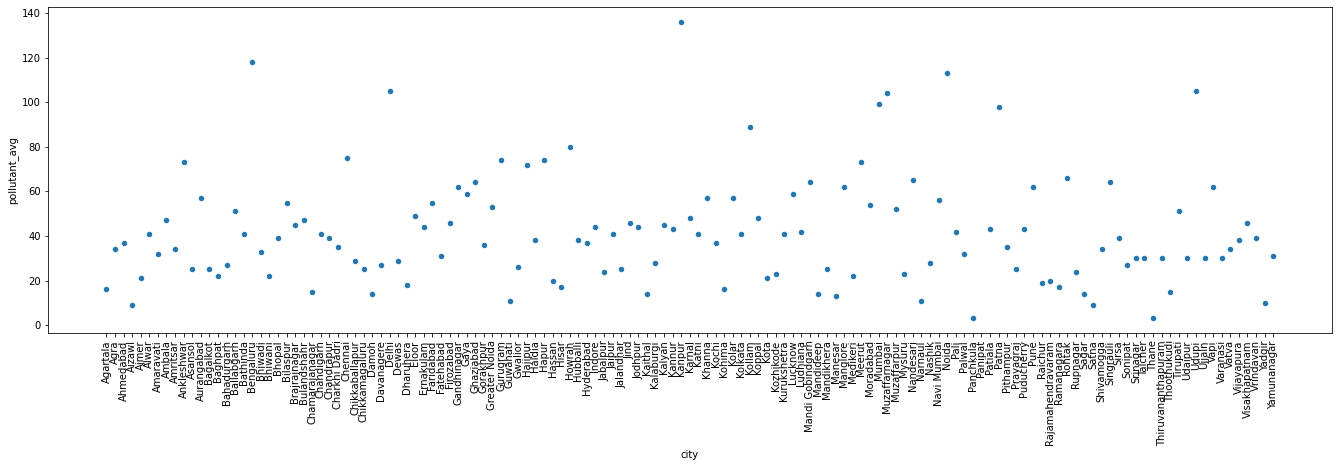

In [19]:
df[df.pollutant_id=='CO'].plot(kind='scatter',x='city',y='pollutant_avg',figsize=(23,6))
plt.xticks(rotation=90)


In [20]:
df[df.pollutant_id=='SO2'].plot(kind='scatter',x='city',y='pollutant_avg',figsize=(23,6))
plt.xticks(rotation=90)
plt.show()

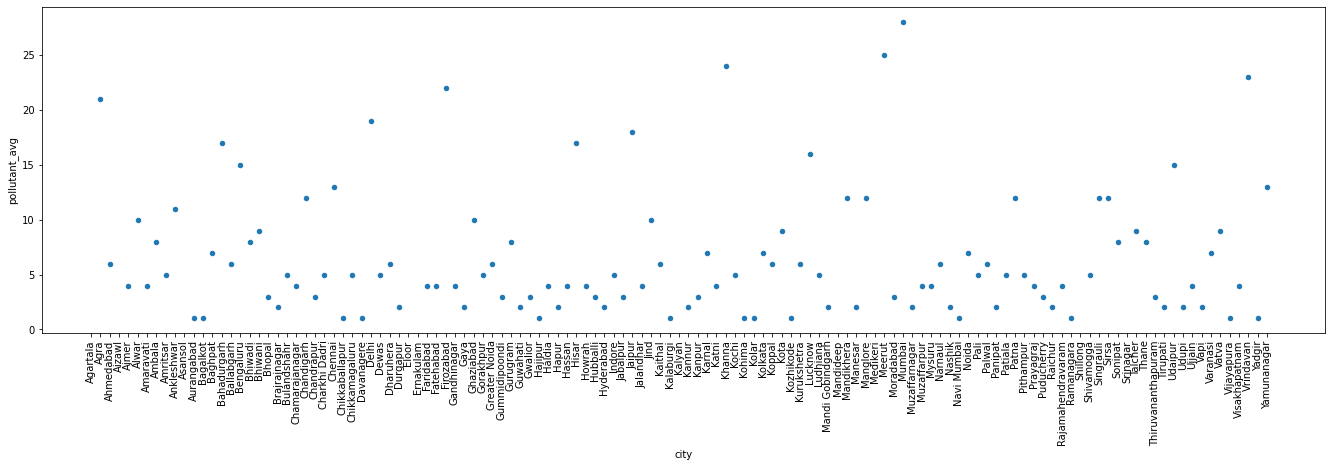

In [21]:
df[df.pollutant_id=='NH3'].plot(kind='scatter',x='city',y='pollutant_avg',figsize=(23,6))
plt.xticks(rotation=90)
plt.show()

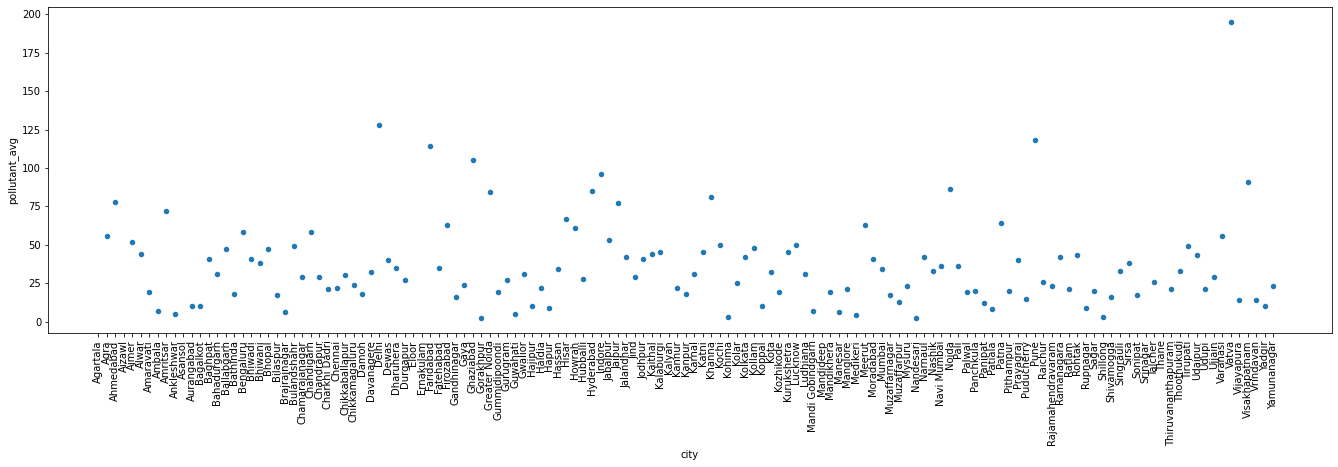

In [22]:
df[df.pollutant_id=='NO2'].plot(kind='scatter',x='city',y='pollutant_avg',figsize=(23,6))
plt.xticks(rotation=90)
plt.show()

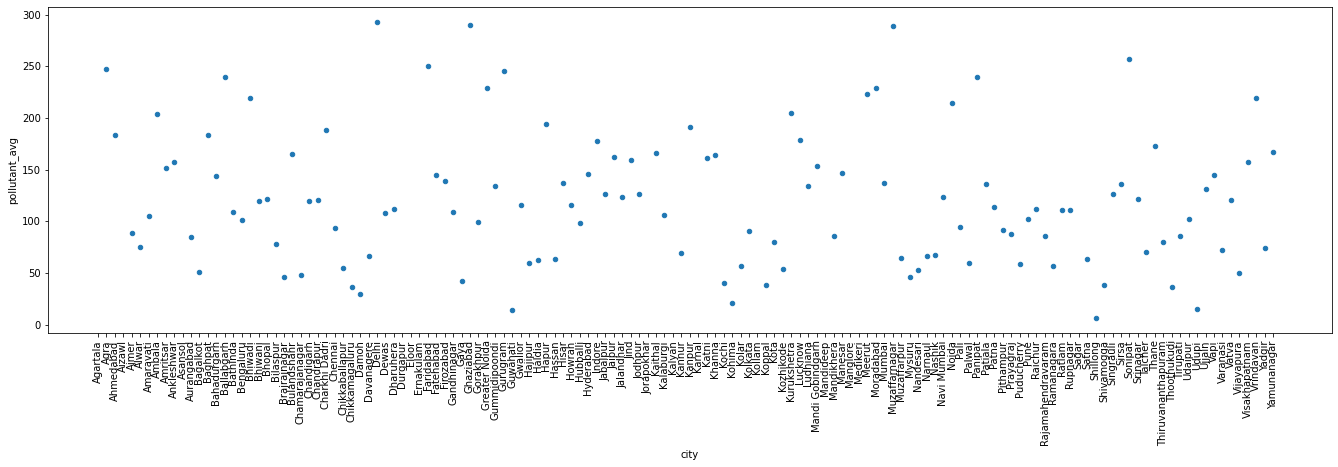

In [23]:
df[df.pollutant_id=='PM10'].plot(kind='scatter',x='city',y='pollutant_avg',figsize=(23,6))
plt.xticks(rotation=90)
plt.show()

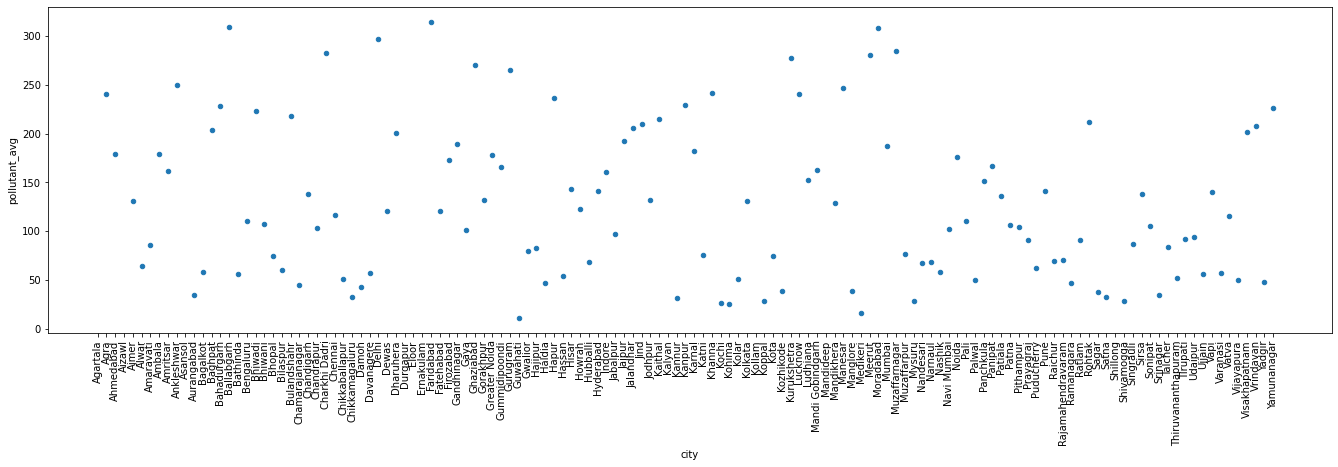

In [24]:
df[df.pollutant_id=='PM2.5'].plot(kind='scatter',x='city',y='pollutant_avg',figsize=(23,6))
plt.xticks(rotation=90)
plt.show()

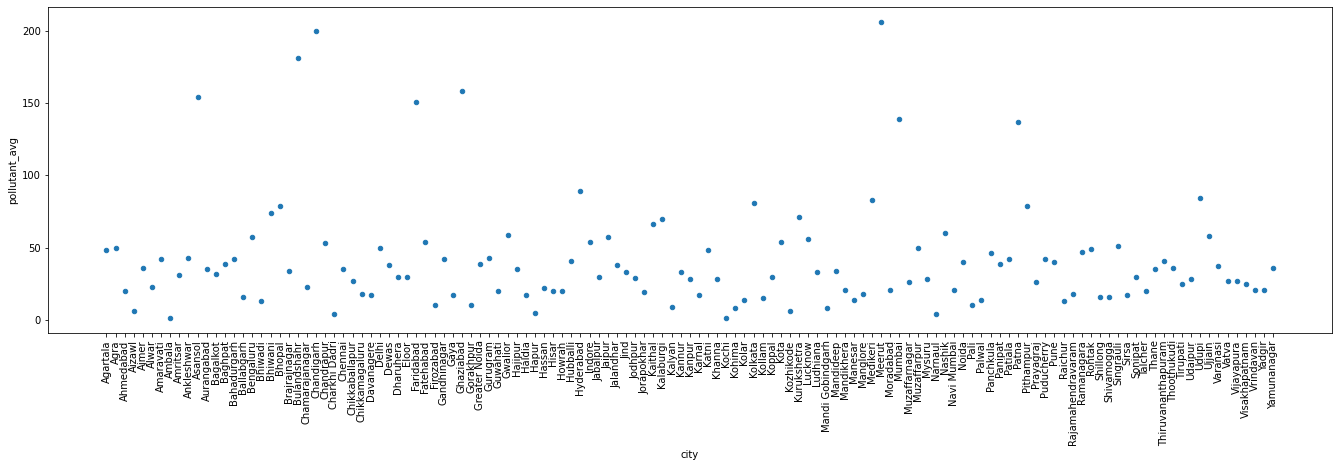

In [25]:
df[df.pollutant_id=='OZONE'].plot(kind='scatter',x='city',y='pollutant_avg',figsize=(23,6))
plt.xticks(rotation=90)
plt.show()

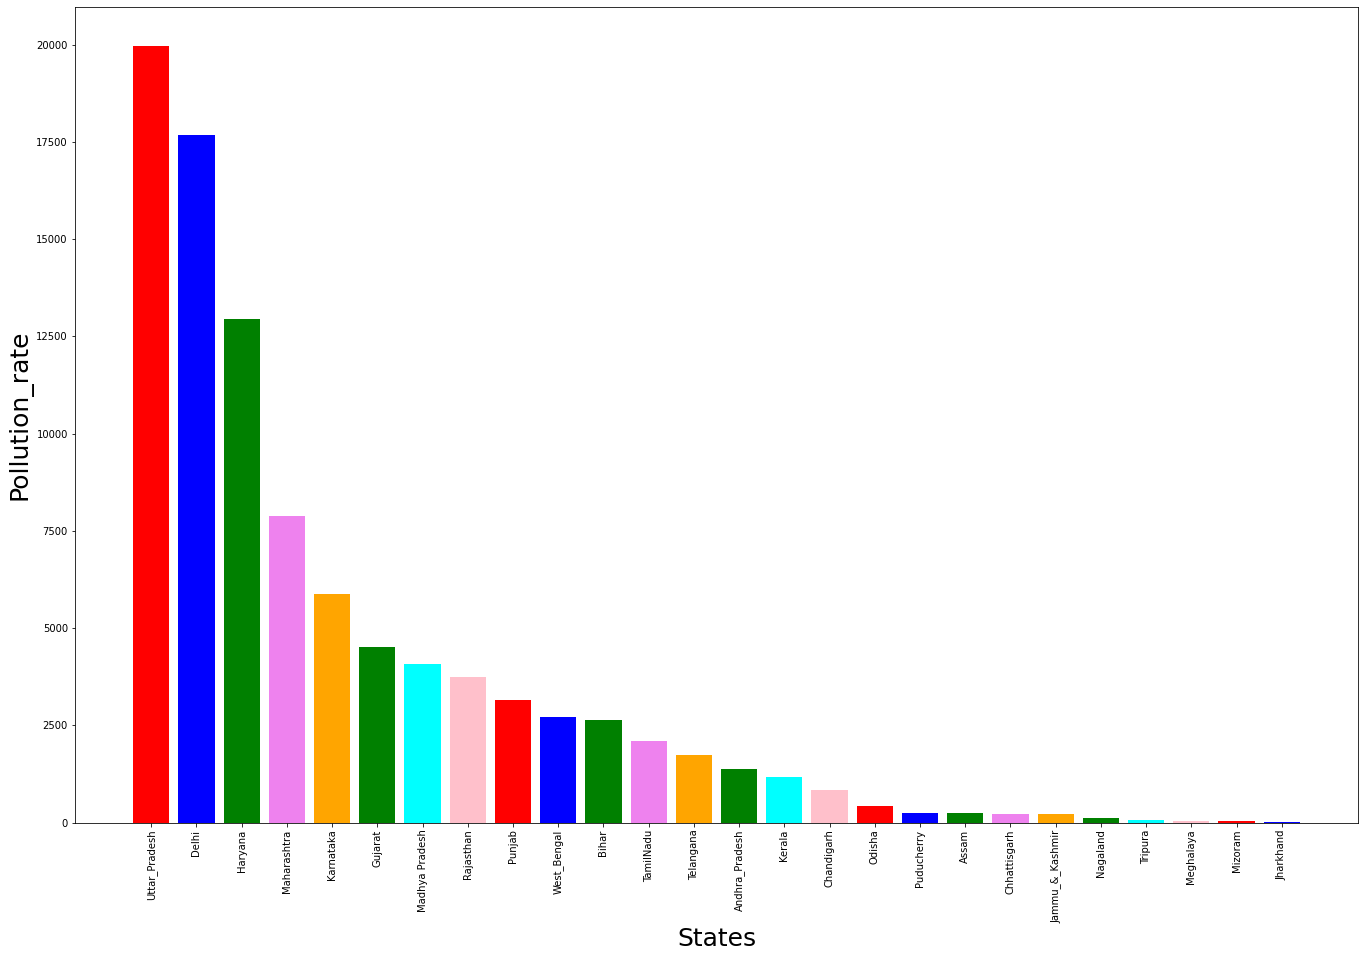

In [26]:
df= pollution.groupby(['state'])['pollutant_avg'].sum().reset_index()
df_sorted= df.sort_values('pollutant_avg',ascending=False)

plt.figure(figsize=(23,15))
plt.bar('state', 'pollutant_avg',data=df_sorted,color=['red','blue','green','violet','orange','green','cyan','pink'])

plt.xlabel("States", size=25)
plt.ylabel("Pollution_rate", size=25)

plt.xticks(rotation=90)

plt.show()


In [27]:
pstate = list(pollution['state'])
pstate = pd.DataFrame(pstate)
pstate.columns = ['State']

In [28]:
p = pollution.drop(['id','country','city','station','pollutant_id','last_update','state'], axis = 1)